**MNIST Digit CLassification using DL**

Importing necessary Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
tf.random.set_seed(42)

Loading the dataset from **Keras**

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Checking some characteristics of dataset

In [ ]:
#shape of traing data
print("Shape of Training data")
print(X_train.shape)
print(Y_train.shape)

Shape of Training data
(60000, 28, 28)
(60000,)


In [ ]:
#shape of testing data
print("Shape of Testing data")
print(X_test.shape)
print(Y_test.shape)

Shape of Testing data
(10000, 28, 28)
(10000,)


Every image is of 28 x 28 dimension, so if we print a single data point from dataset we will get 28 x 28

In [ ]:
print(X_test[20].shape)

(28, 28)


Lets plot and see the digit through visulaisation

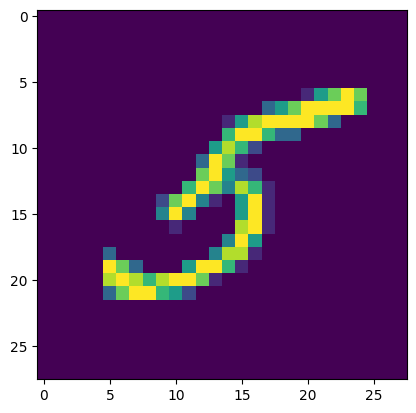

5


In [ ]:
# Plotting the image
plt.imshow(X_train[35])
plt.show()

# As we have labeled dataset, so lets prints its label
print(Y_train[35])

Lets perform preprocessing on the dataset

In [ ]:
# data standardization
X_train = X_train/255
X_test = X_test/255

In [ ]:
# lets print any image raw values , those values will show the greyscale level
X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

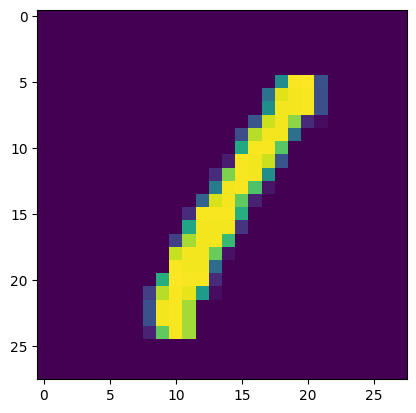

1


In [ ]:
# Now lets visualize the same value
plt.imshow(X_train[3])
plt.show()
print(Y_train[3])

**Neural Network**

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8487 - loss: 0.5269
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1551
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9682 - loss: 0.1096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0858
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0402
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0351
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9904 - loss: 0.0307


The training data accuracy is **99.04%**

Lets now evaluate our model on test data

In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9669 - loss: 0.1367
0.9714000225067139


Test Data Accuracy is **97.14%**

In [18]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


The output of Y predict is in points form which is the probability levels , that ranges between 0 and 1 lets convert it into readable form(Labels)

In [19]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Evalusation:**

Text(0.5, 47.7222222222222, 'Predicted Labels')

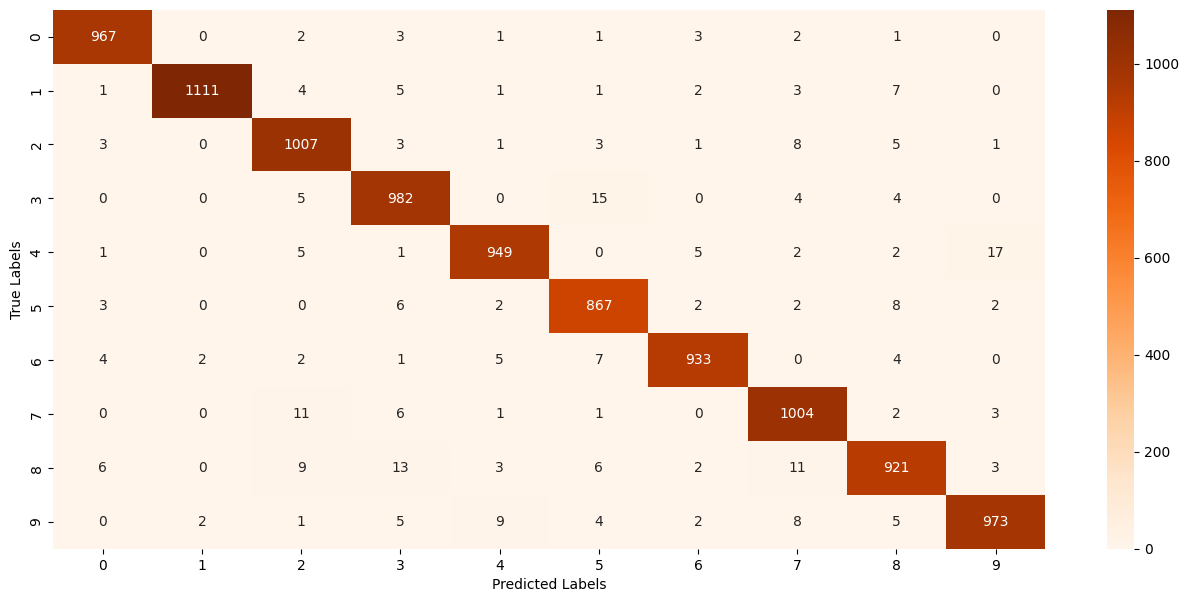

In [22]:
#confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(16,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Prediction Syatem:**

In [23]:
# Taking image path as an input
input_image_path = input('Enter the Path of an image to be predicted: ')

Enter the Path of an image to be predicted: /content/MNIST_digit.png


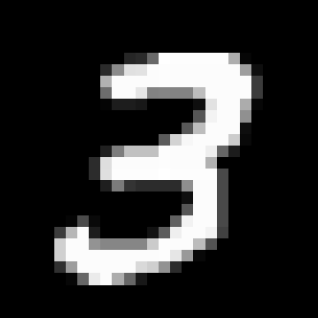

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [24]:
#reading the image with CV2
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

#finding the greyscale values as our project utilizes the greyscale concept
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

#making the image suitable for our model(Preprocessing)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])

#making prediction
input_prediction = model.predict(image_reshaped)

#converting the probability values into label
input_pred_label = np.argmax(input_prediction)


In [25]:
print('The Handwritten Digit is recognised as ', input_pred_label)

The Handwritten Digit is recognised as  3
